# Capstone Project 1: Statistics

Today, we will be performing some statistical analysis on the dataset.  We spent some time cleaning the data then looked at some graphical data analysis to see what story the data was telling us.  Now, we will jump into some statistics to get a more concrete feeling for what the data has to offer.  

We will start by importing the libraries that will be needed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t

Set some options to make the data a little easier to read.

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

Read the dataset.

In [3]:
df = pd.read_csv('Data/Loan_Storied.csv',low_memory=False,index_col=0, 
                parse_dates=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 
                               'debt_settlement_flag_date', 'settlement_date'])

C:\Users\Scott\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Take a peek at the data to make sure it looks correct.

In [4]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,meets_credit_policy
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,B,B2,NaN,10.000,RENT,24000.000,Verified,2011-12-01,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,1985-01-01,1.000,nan,nan,3.000,0.000,13648.000,0.837,9.000,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,2015-01-01,171.620,NaT,2019-05-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,C,C4,Ryder,0.500,RENT,30000.000,Source Verified,2011-12-01,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,1999-04-01,5.000,nan,nan,3.000,0.000,1687.000,0.094,4.000,f,0.000,0.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,2013-04-01,119.660,NaT,2016-10-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,C,C5,NaN,10.000,RENT,12252.000,Not Verified,2011-12-01,Fully Paid,n,NaN,small_business,real estate business,606xx,

For now lets narrow the dataframe to the columns that I want to concentrate on:
* Loan Status
* Loan Amount
* Annual Income
* Installment (monthly payment)
* DTI (debt-to-income ratio)
* Credt inquiries in the last 6 monts for the secondary applicant 
* Ratio of total currnt balance to high credit/credit limt for all revolving accounts
* Number of charge-offs within last 12 monts at time of application for the secondary applicant

In [5]:
# Redefine the dataframe with only my desired columns
df = df[['loan_status','loan_amnt','annual_inc','installment','dti','sec_app_inq_last_6mths','sec_app_revol_util','chargeoff_within_12_mths']]

In [6]:
# Print the first 5 rows of the dataframe
df.head()

,loan_status,loan_amnt,annual_inc,installment,dti,sec_app_inq_last_6mths,sec_app_revol_util,chargeoff_within_12_mths
0,Fully Paid,5000.000,24000.000,162.870,27.650,nan,nan,0.000
1,Charged Off,2500.000,30000.000,59.830,1.000,nan,nan,0.000
2,Fully Paid,2400.000,12252.000,84.330,8.720,nan,nan,0.000
3,Fully Paid,10000.000,49200.000,339.310,20.000,nan,nan,0.000
4,Fully Paid,3000.000,80000.000,67.790,17.940,nan,nan,0.000


In [7]:
# get a quick numerical description of the dataframe columns
df.describe()

,loan_amnt,annual_inc,installment,dti,sec_app_inq_last_6mths,sec_app_revol_util,chargeoff_within_12_mths
count,1422722.000,1422718.000,1422722.000,1422261.000,22606.000,22220.000,1422577.000
mean,14432.939,76350.892,438.197,18.318,0.743,57.187,0.009
std,8748.676,70170.055,262.307,11.390,1.084,26.313,0.109
min,500.000,0.000,4.930,0.000,0.000,0.000,0.000
25%,7975.000,45756.000,247.970,11.790,0.000,38.000,0.000
50%,12000.000,65000.000,374.755,17.630,0.000,59.300,0.000
75%,20000.000,90000.000,581.090,24.090,1.000,78.300,0.000
max,40000.000,10999200.000,1719.830,999.000,6.000,212.600,10.000


In [8]:
#  get a quick description of the dataframe data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422722 entries, 0 to 1422721
Data columns (total 8 columns):
loan_status                 1422722 non-null object
loan_amnt                   1422722 non-null float64
annual_inc                  1422718 non-null float64
installment                 1422722 non-null float64
dti                         1422261 non-null float64
sec_app_inq_last_6mths      22606 non-null float64
sec_app_revol_util          22220 non-null float64
chargeoff_within_12_mths    1422577 non-null float64
dtypes: float64(7), object(1)
memory usage: 97.7+ MB


Here we are creting a quick function that will create a heatmap.  This heat map will show correlation between a number of columns.  What we are hoping to see is a strong correlation between columns for a single category, either Fully Paid or Charged Off/Default.  

In [9]:
def heatMap(df, mirror=False):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(10, 10))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()

We will not take a look at the heatmap generated for the Fully Paid population.  

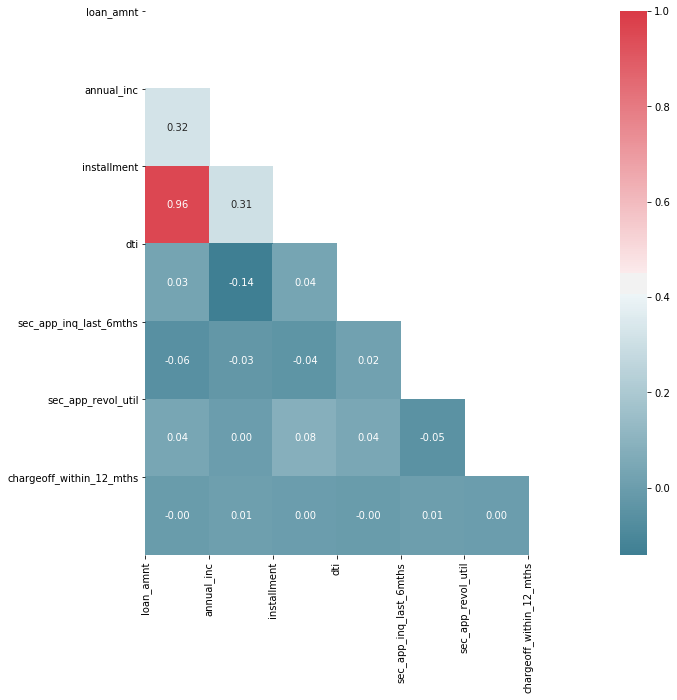

In [10]:
heatMap(df[df['loan_status']=='Fully Paid'])

Well, those don't look too promising really.  Hopefully when we bring some of that data together then they will be able to do an adequate job of picking out the charged off loans.  

Let's do a little analysis on a few of the more promising looking columns.  

First we will do some analysis on the Annual Income of the population.  We would expect the population with Charged Off/Default loans to have a lower average income, but exactly how much lower and how confident are we with that assumption.  

In [11]:
# print some basic Annual Income statistics for the Charged Off population
df[df['loan_status']=='Charged Off'].annual_inc.describe()

count    282322.000
mean      70581.152
std       67608.281
min           0.000
25%       43000.000
50%       60000.000
75%       85000.000
max     9573072.000
Name: annual_inc, dtype: float64

In [12]:
df[df['loan_status']=='Fully Paid'].annual_inc.describe()

count    1140377.000
mean       77779.142
std        70717.674
min            0.000
25%        47000.000
50%        65000.000
75%        93000.000
max     10999200.000
Name: annual_inc, dtype: float64

A histogram gives a better feel for the Annual Income data.  After taking a look, it seems they aren't too far off of one another.  Could it be random chance that the Fully Paid population has a higher annual income?  We will find out with some statistical analysis.  

C:\Users\Scott\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Scott\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


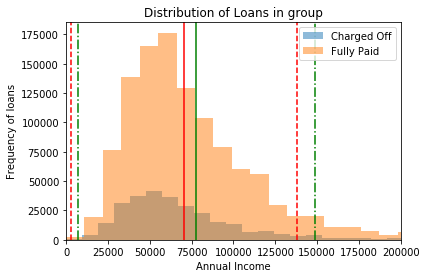

In [13]:
_ = plt.hist(df[df['loan_status']=='Charged Off'].annual_inc, bins=1000, alpha=0.5, label='Charged Off')
_ = plt.hist(df[df['loan_status']=='Fully Paid'].annual_inc, bins=1000,  alpha=0.5, label='Fully Paid')
_ = plt.xlabel('Annual Income')
_ = plt.ylabel('Frequency of loans')
_ = plt.title('Distribution of Loans in group')
_ = plt.legend()
_ = plt.xlim([0,200000])
_ = plt.axvline(70581, color='r')
_ = plt.axvline(70581+67608, color='r', linestyle='--')
_ = plt.axvline(70581-67608, color='r', linestyle='--')
_ = plt.axvline(77779, color='g')
_ = plt.axvline(77779+70717, color='g', linestyle='-.')
_ = plt.axvline(77779-70717, color='g', linestyle='-.')

In [14]:
# Narrow the dataframe down to just the Loan Status and Annual Income
df_income_nan = df[['loan_status','annual_inc']]
# Drop any rows that do not include an annual income
df_income = df_income_nan.dropna().reset_index(drop=True)
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422718 entries, 0 to 1422717
Data columns (total 2 columns):
loan_status    1422718 non-null object
annual_inc     1422718 non-null float64
dtypes: float64(1), object(1)
memory usage: 21.7+ MB


In [15]:
# Make an array of charged off and fully paid incomes
charged_off_incomes = df_income[(df_income['loan_status']=='Charged Off') | (df_income['loan_status']=='Default')].annual_inc
fully_paid_incomes = df_income[(df_income['loan_status']=='Fully Paid')].annual_inc

One more visual for the loans.  An Empirical Cumulative Distribution Function (ECDF) is a good alternative to a historgram.  They shows the proportion of scores that are less than or equal to each score.  Again, you can see that the two groups are close but not the same.  

In [16]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [17]:
x_co,y_co = ecdf(charged_off_incomes)
x_fp,y_fp = ecdf(fully_paid_incomes)

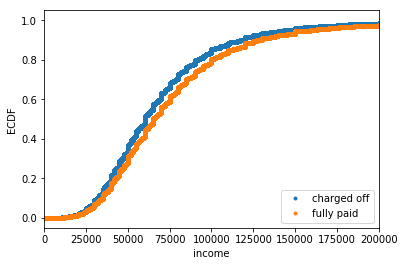

In [18]:
# Generate plot
_ = plt.plot(x_co,y_co,marker = '.',linestyle = 'none')
_ = plt.plot(x_fp,y_fp,marker = '.',linestyle = 'none')

# Label the axes
_ = plt.ylabel('ECDF')
_ = plt.xlabel('income')

# Limit the x-axis so we can see the most relevant data
_ = plt.xlim([0,200000])

plt.legend(('charged off', 'fully paid'), loc='lower right')

# Display the plot
plt.show()

In order to analyze the data we will need to make a null hypothesis and then test that hypothesis.  We will hypothesize that Average Income has no effect on a populations ability to pay off a loan.  In our case, the null hypothesis will state that there is no difference between the Annual Incomes of the Charged Off/Default population and the Annual Incomes of the Fully Paid income.  

To test our null hypothesis we will take all of the incomes of both populations, randomize them, and then split them back up into two groups.  If there is no difference between the two original groups then our new groups will behave the same way as our original groups.  

We will create functions that can randomize the data from the two groups and then split that data back into two new groups.  We then determine if there is a difference in the average of those two groups. 

In [19]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [20]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [21]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff


Using our new functions we will perform this process 10,000 times to see how likely it is that the result we saw could happen if the null hypothesis were true.  

In [22]:
# Compute difference of mean from sample data: empirical_diff_means
empirical_diff_means = diff_of_means(fully_paid_incomes,charged_off_incomes)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(fully_paid_incomes,charged_off_incomes,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0


We have a p-value very close to zero.  The histgram below gives a visual representation of the distribution of our data based on the null hypothesis (the blue peak) and the empirical value (the red line).  

C:\Users\Scott\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


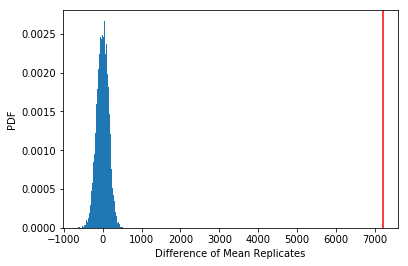

In [23]:
# Make a histogram of the results
_ = plt.hist(perm_replicates, bins=50, normed=True)
_ = plt.xlabel('Difference of Mean Replicates')
_ = plt.ylabel('PDF')
_ = plt.axvline(empirical_diff_means, color='r')

# Show the plot
plt.show()

Now we will build a confidence interval.  It will tell us, with 95% confidence, what is the difference between the average income of the Charged Off/Default loan population and the Full Paid loan population.  

We build two function to randomly sample the data from each group individually and then take the difference of the average of the two groups.  

In [24]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [25]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

Get the empirical difference between the two means.

In [26]:
mean_diff =  np.mean(fully_paid_incomes) - np.mean(charged_off_incomes)

Run the functions 10,000 times each.  

In [28]:
bs_replicates_paid = draw_bs_reps(fully_paid_incomes,np.mean,10000)
bs_replicates_charged = draw_bs_reps(charged_off_incomes,np.mean,10000)

In [29]:
bs_diff_replicates = bs_replicates_paid - bs_replicates_charged

In [30]:
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

In [31]:
print('difference of means =', mean_diff, '$')
print('95% confidence interval =', conf_int, '$')

difference of means = 7196.958487397555 $
95% confidence interval = [6912.07316004 7476.78195644] $


The below historgram shows a graphical representation of the data and the 95% confidence interval.  

C:\Users\Scott\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


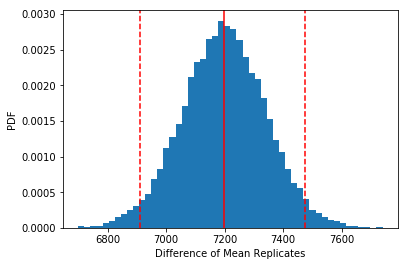

In [32]:
# Make a histogram of the results
_ = plt.hist(bs_diff_replicates, bins=50, normed=True)
_ = plt.xlabel('Difference of Mean Replicates')
_ = plt.ylabel('PDF')
_ = plt.axvline(mean_diff, color='r')
_ = plt.axvline(conf_int[0], color='r', linestyle='--')
_ = plt.axvline(conf_int[1], color='r', linestyle='--')

# Show the plot
plt.show()